In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**EDA
Understanding all the columns for the EDA.**

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender_data = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
train_data.shape

(891, 12)

In [6]:
test_data.shape

(418, 11)

In [7]:
gender_data.shape

(418, 2)

In [8]:
train_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
test_data.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
train_data.duplicated().sum()

0

In [15]:
test_data.duplicated().sum()

0

In [16]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Visualising all the columns for analysis and EDA.**

<Axes: ylabel='count'>

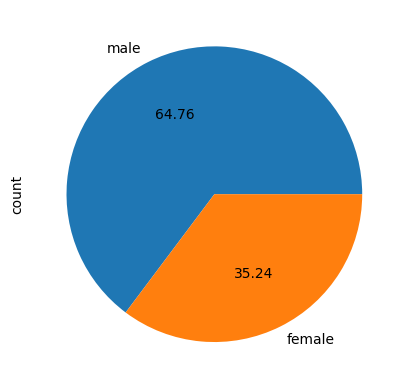

In [17]:
train_data['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

In [18]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

After looking at the counts and percentage of the male and female traveling in the titanic, we got to know that around 577 male passengers and 314 were female passengers.

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

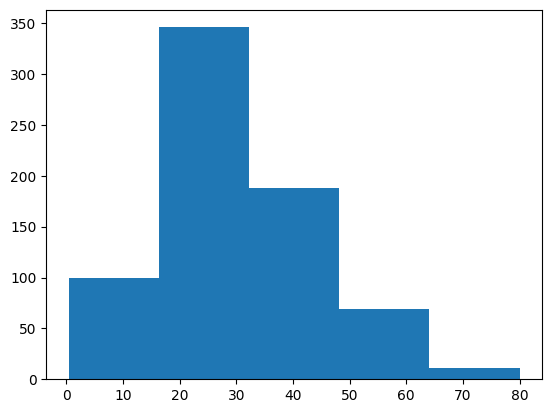

In [19]:
import matplotlib.pyplot as plt
plt.hist(train_data['Age'],bins=5)

The histogram shows the age distribution of passenger traveling in the titanic. And by looking at the histogram we got to know that most of the passengers were of age between 20 to 30.

/tmp/ipykernel_33/731424116.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

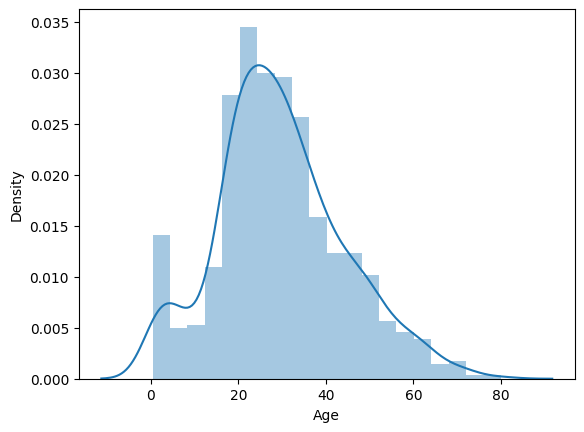

In [20]:
import seaborn as sns
sns.distplot(train_data['Age'])

In [21]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

After looking at the count of passengers by passenger class data, there were around 491 passengers in class 3, 184 passengers in class 2 and 216 passengers in class 1.

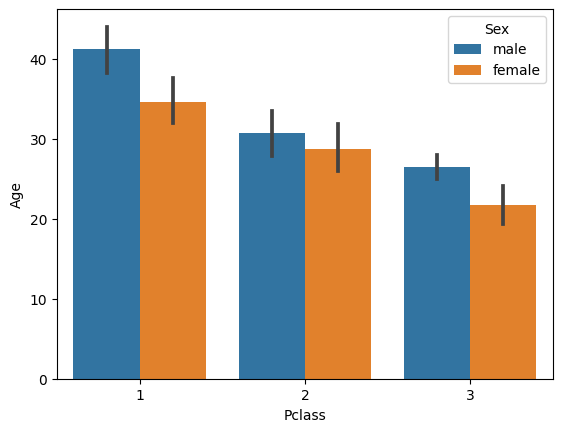

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Pclass', y='Age', hue='Sex', data=train_data)

plt.show()

The bar plot shows the comparing the average ages across different passenger classes and between sexes. It helps in understanding the demographic distribution of passengers in each class, providing insights into who was traveling in different classes on the Titanic.

<Axes: xlabel='Pclass', ylabel='Age'>

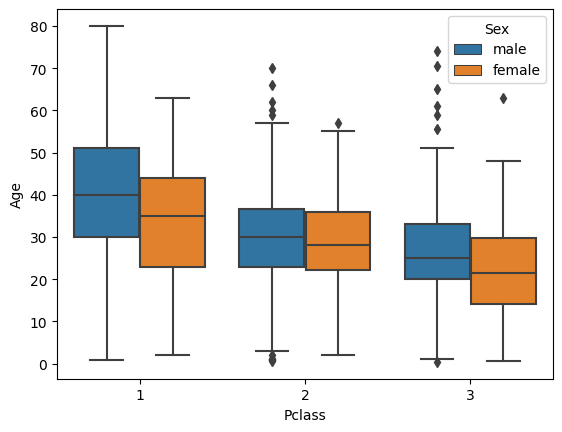

In [23]:
import seaborn as sns
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train_data)

/tmp/ipykernel_33/2244254090.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[train_data['Survived']==0]['Age'],hist=False)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/2244254090.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` 

<Axes: xlabel='Age', ylabel='Density'>

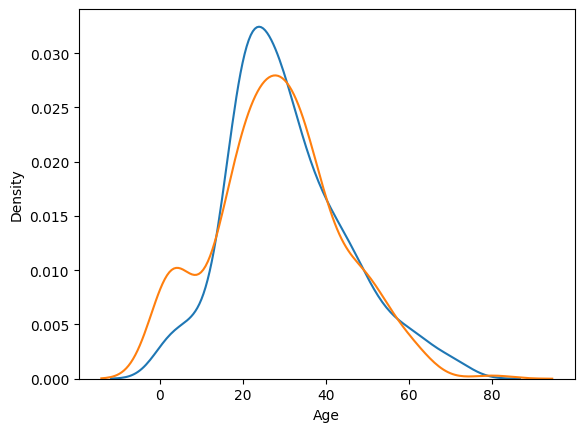

In [24]:
sns.distplot(train_data[train_data['Survived']==0]['Age'],hist=False)
sns.distplot(train_data[train_data['Survived']==1]['Age'],hist=False)

In [25]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

After looking at the survived data we got to know that only 342 passengers survived, and 549 passengers lost their life.

**Checking for null values and fixing them**

In [28]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
# Fill missing values in 'Age' with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


/tmp/ipykernel_33/1967174278.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
/tmp/ipykernel_33/1967174278.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [31]:
# Fill missing values in 'Age' with the median
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode
test_data['Fare'].fillna(test_data['Fare'].mode()[0], inplace=True)

/tmp/ipykernel_33/1890116695.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
/tmp/ipykernel_33/1890116695.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [32]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [33]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [34]:
import pandas as pd

# Comparing survival with Pclass
pclass_pivot = pd.pivot_table(train_data, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')
print(pclass_pivot)
print()

# Comparing survival with Sex
sex_pivot = pd.pivot_table(train_data, index='Survived', columns='Sex', values='Ticket', aggfunc='count')
print(sex_pivot)
print()

# Comparing survival with Embarked
embarked_pivot = pd.pivot_table(train_data, index='Survived', columns='Embarked', values='Ticket', aggfunc='count')
print(embarked_pivot)


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


## Summary of Survival Analysis

### Pclass vs. Survival

| Pclass | Not Survived | Survived |
|--------|--------------|----------|
| 1      | 80           | 136      |
| 2      | 97           | 87       |
| 3      | 372          | 119      |

**First Class (Pclass 1)**:
- 80 passengers did not survive.
- 136 passengers survived.

**Second Class (Pclass 2)**:
- 97 passengers did not survive.
- 87 passengers survived.

**Third Class (Pclass 3)**:
- 372 passengers did not survive.
- 119 passengers survived.

**Summary**: First-class passengers had a higher survival rate compared to second and third-class passengers. The majority of the third-class passengers did not survive.

### Sex vs. Survival

| Sex    | Not Survived | Survived |
|--------|--------------|----------|
| Female | 81           | 233      |
| Male   | 468          | 109      |

**Female**:
- 81 females did not survive.
- 233 females survived.

**Male**:
- 468 males did not survive.
- 109 males survived.

**Summary**: Females had a significantly higher survival rate compared to males.

### Embarked vs. Survival

| Embarked | Not Survived | Survived |
|----------|--------------|----------|
| C        | 75           | 93       |
| Q        | 47           | 30       |
| S        | 427          | 219      |

**Cherbourg (C)**:
- 75 passengers did not survive.
- 93 passengers survived.

**Queenstown (Q)**:
- 47 passengers did not survive.
- 30 passengers survived.

**Southampton (S)**:
- 427 passengers did not survive.
- 219 passengers survived.

**Summary**: Passengers who embarked from Cherbourg had a higher survival rate compared to those who embarked from Queenstown and Southampton. The majority of passengers from Southampton did not survive, possibly due to the larger number of passengers embarking from there.

### Overall Summary
- **Class**: Higher-class passengers (1st class) had better survival rates.
- **Gender**: Females had a much higher survival rate compared to males.
- **Embarkation Point**: Passengers who embarked from Cherbourg had the best survival rates, followed by those from Southampton and then Queenstown.


# Data preprocessing

**Reemove the unnecessary columns**

In [35]:
train_data.drop(columns=['Ticket', 'Cabin','Name'], inplace=True)

# Display the first few rows to confirm the columns are removed
print(train_data.head())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


In [36]:
# Assuming train_data is your DataFrame
test_data.drop(columns=['Ticket', 'Cabin','Name'], inplace=True)

# Display the first few rows to confirm the columns are removed
print(test_data.head())


   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    male  34.5      0      0   7.8292        Q
1          893       3  female  47.0      1      0   7.0000        S
2          894       2    male  62.0      0      0   9.6875        Q
3          895       3    male  27.0      0      0   8.6625        S
4          896       3  female  22.0      1      1  12.2875        S


In [37]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


**Encoding of the data**

In [38]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Columns to encode
cols = ['Sex', 'Embarked']

# Encode each column
for col in cols:
    train_data[col] = le.fit_transform(train_data[col])

# Display the first few rows to confirm the encoding
print(train_data.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2


In [39]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Columns to encode
cols = ['Sex', 'Embarked']

# Encode each column
for col in cols:
    test_data[col] = le.fit_transform(test_data[col])

# Display the first few rows to confirm the encoding
print(test_data.head())


   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0          892       3    1  34.5      0      0   7.8292         1
1          893       3    0  47.0      1      0   7.0000         2
2          894       2    1  62.0      0      0   9.6875         1
3          895       3    1  27.0      0      0   8.6625         2
4          896       3    0  22.0      1      1  12.2875         2


**Standardization**

In [40]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Select columns to standardize
columns_to_standardize = ['Age', 'SibSp', 'Parch', 'Fare']

# Standardize the selected columns
train_data[columns_to_standardize] = scaler.fit_transform(train_data[columns_to_standardize])

# Display the first few rows to confirm standardization
train_data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,-0.565736,0.432793,-0.473674,-0.502445,2
1,2,1,1,0,0.663861,0.432793,-0.473674,0.786845,0
2,3,1,3,0,-0.258337,-0.474545,-0.473674,-0.488854,2
3,4,1,1,0,0.433312,0.432793,-0.473674,0.420730,2
4,5,0,3,1,0.433312,-0.474545,-0.473674,-0.486337,2


In [41]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Select columns to standardize
columns_to_standardize = ['Age', 'SibSp', 'Parch', 'Fare']

# Standardize the selected columns
test_data[columns_to_standardize] = scaler.fit_transform(test_data[columns_to_standardize])

# Display the first few rows to confirm standardization
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,0.386231,-0.499470,-0.400248,-0.497063,1
1,893,3,0,1.371370,0.616992,-0.400248,-0.511926,2
2,894,2,1,2.553537,-0.499470,-0.400248,-0.463754,1
3,895,3,1,-0.204852,-0.499470,-0.400248,-0.482127,2
4,896,3,0,-0.598908,0.616992,0.619896,-0.417151,2


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Split train_data into features (X) and target variable (y)
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']

# Train a model
model = RandomForestClassifier()  # Example model (you can choose any other model)
model.fit(X_train, y_train)

# Make predictions on test_data
predictions = model.predict(test_data)

# Create a DataFrame for submission
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})

# Save submission to CSV file
submission.to_csv('submission.csv', index=False)